#### Import key libraries, classes and functions

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

#### Input data

In [4]:
df = pd.read_csv('Data/samples.csv', index_col=0, parse_dates=True)

In [5]:
df.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


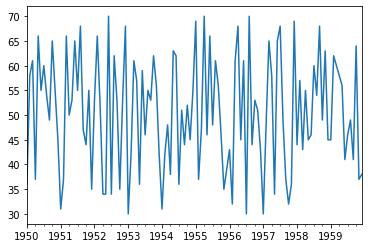

In [7]:
df['a'].plot() # Stationary data

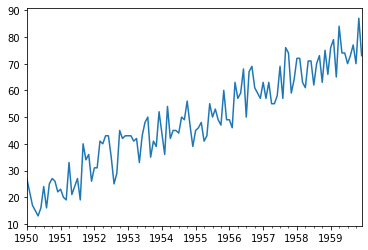

In [8]:
df['b'].plot() # Non-stationary data - Trend present

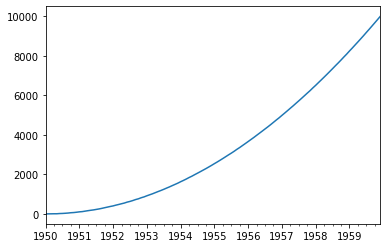

In [9]:
df['c'].plot()

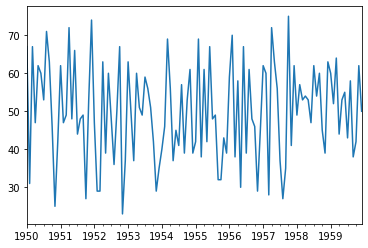

In [10]:
df['d'].plot()

In [11]:
from statsmodels.tsa.statespace.tools import diff

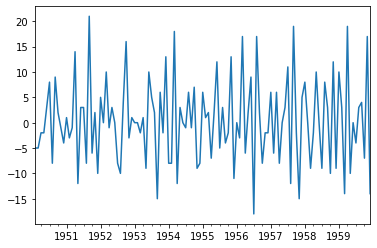

In [15]:
# df['b'] - df['b'].shift(1)
diff(df['b'], k_diff=1).plot()

#### ACF and PACF plot

In [16]:
import statsmodels.api as sm

In [17]:
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

In [18]:
#NON STATIONARY
df1 = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)

In [21]:
df1.index.freq = 'MS'

In [22]:
df1.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [27]:
# STATIONARY 
df2 = pd.read_csv("Data/DailyTotalFemaleBirths.csv",index_col='Date', parse_dates=True)
df2.index.freq='D'

In [28]:
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Freq: D
Data columns (total 1 columns):
Births    365 non-null int64
dtypes: int64(1)
memory usage: 5.7 KB


In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.DataFrame({'a':[13,5,11,12,9]})

In [36]:
df

,a
0,13
1,5
2,11
3,12
4,9


In [41]:
acf(df['a'])

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

In [43]:
pacf_yw(df['a'], nlags=4, method='unbiased')

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

In [45]:
pacf_ols(df['a'], nlags=4)

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

#### Lag Plotting

In [47]:
from pandas.plotting import lag_plot

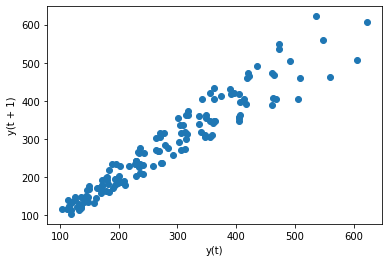

In [48]:
lag_plot(df1['Thousands of Passengers']);

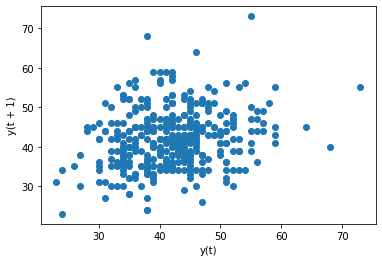

In [49]:
lag_plot(df2['Births'])

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

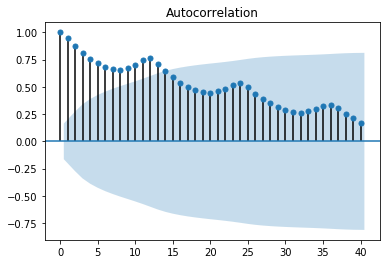

In [53]:
plot_acf(df1, lags=40);

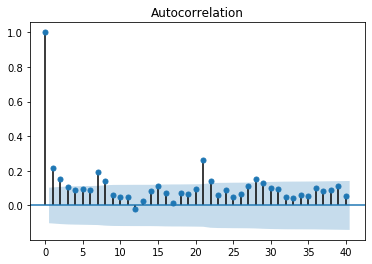

In [54]:
plot_acf(df2, lags=40);

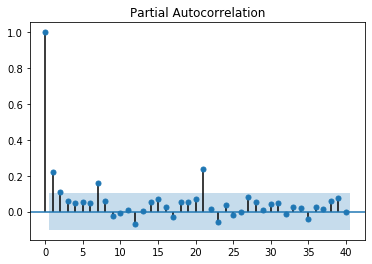

In [56]:
plot_pacf(df2, lags=40);